In [1]:
!curl https://course.fast.ai/setup/colab | bash

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   321  100   321    0     0     57      0  0:00:05  0:00:05 --:--:--    78
Updating fastai...
featuretools 0.4.1 has requirement pandas>=0.23.0, but you'll have pandas 0.22.0 which is incompatible.
albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.8 which is incompatible.
Done.


In [0]:
# Import libs
from fastai.vision import *

# Setup 
%reload_ext autoreload
%autoreload 2
%matplotlib inline

# Linear Regression problem

In [0]:
n = 100

In [56]:
x = torch.ones(n, 2)
x[:, 0].uniform_(-1., 1)
x[:5]

tensor([[-0.7096,  1.0000],
        [-0.9033,  1.0000],
        [-0.1879,  1.0000],
        [-0.5813,  1.0000],
        [-0.6337,  1.0000]])

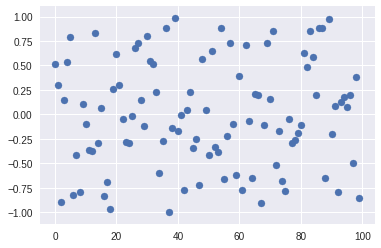

In [43]:
plt.scatter(np.arange(0, 100), x[:, 0])

In [57]:
a = tensor(3., 2.); a

tensor([3., 2.])

In [0]:
y = x@a + torch.rand(n)

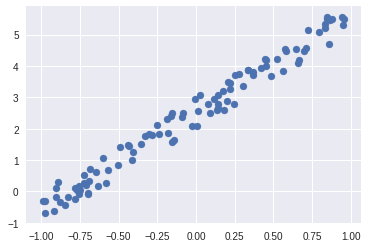

In [59]:
plt.scatter(x[:, 0], y)

In [0]:
def mse(y_hat, y): return ((y_hat - y)**2).mean()

In [0]:
a = tensor(-1., 1.)

In [62]:
y_hat = x@a
mse(y_hat, y)

tensor(7.6470)

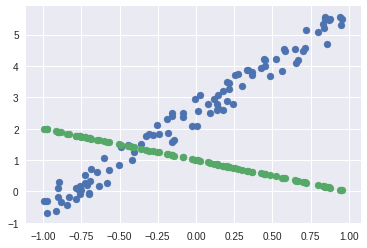

In [63]:
plt.scatter(x[:, 0], y)
plt.scatter(x[:, 0], y_hat)

# Gradient Descent

In [64]:
a = nn.Parameter(a); a

Parameter containing:
tensor([-1.,  1.], requires_grad=True)

In [0]:
def update():
    y_hat = x@a
    loss = mse(y, y_hat)
    if ((t % 10) == 0):
        print(loss)
    loss.backward()
    with torch.no_grad():
        a.sub_(lr * a.grad)
        a.grad.zero_()

In [66]:
lr = 1e-1
for t in range(100):
    update()

tensor(7.6470, grad_fn=<MeanBackward1>)
tensor(1.5937, grad_fn=<MeanBackward1>)
tensor(0.4547, grad_fn=<MeanBackward1>)
tensor(0.1737, grad_fn=<MeanBackward1>)
tensor(0.1033, grad_fn=<MeanBackward1>)
tensor(0.0857, grad_fn=<MeanBackward1>)
tensor(0.0813, grad_fn=<MeanBackward1>)
tensor(0.0802, grad_fn=<MeanBackward1>)
tensor(0.0799, grad_fn=<MeanBackward1>)
tensor(0.0798, grad_fn=<MeanBackward1>)


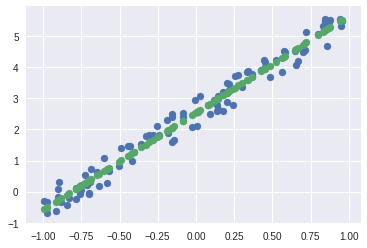

In [67]:
plt.scatter(x[:, 0], y)
plt.scatter(x[:, 0], x@a)

In [0]:
from matplotlib import animation, rc
rc("animation", html="jshtml")

In [70]:
a = nn.Parameter(tensor([-1., 1.]))

fig = plt.figure()
plt.scatter(x[:, 0], y, c="red")
line,= plt.plot(x[:, 0], x@a)
plt.close()

def animate(i):
    update()
    line.set_ydata(x@a)
    return line

animation.FuncAnimation(fig, animate, np.arange(0, 100), interval=20)